In [ ]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
layer=1 #Change to 0 or 1 , 0 for layer 1 , 1 for layer 2

In [ ]:
label=label=pre.create_label(layer)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,max_features=1500 ,use_idf=False,lowercase=True,ngram_range=(1,2),analyzer=u'word',smooth_idf=False)
tv_matrix = tv.fit_transform(output)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

16036
[['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['GEN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MIN'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MAJ'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MAJ'], ['GEN'], ['GEN'], ['MAJ'], ['GEN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MAJ'], ['MAJ'], ['MIN'], ['MAJ'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['MAJ'], ['MAJ'], ['MIN'], ['GEN'], ['MAJ'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['M

In [ ]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])

In [ ]:
import numpy as np
num_rows= len(new_tv)
num_colms=len(new_tv[0])
modified_tv=[]
padding=np.zeros(num_colms, dtype = int)
num_rows= len(new_tv)
for i in range(0,num_rows):
  if (i ==0):
    x=np.append(padding,new_tv[0])
    x=np.append(x,new_tv[1])
    modified_tv.append(x)

  elif(i==(num_rows-1)):
    x=np.append(new_tv[num_rows-2],new_tv[num_rows-1])
    x=np.append(x,padding)
    modified_tv.append(x)
  else:
    x=np.append(new_tv[i-1],new_tv[i])
    x=np.append(x,new_tv[i+1])
    modified_tv.append(x)

modified_tv
df_tfidf=pre.pd.DataFrame(pre.np.round(modified_tv, 10))
df_tfidf["tag"]=new_label
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4461,4462,4463,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,tag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MIN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MIN
16038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
16039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
16040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ


Creating X

In [ ]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['CNT' 'GEN' 'MAJ' 'MIN']


SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(10748, 4500)
10748


In [ ]:
X_train=X_tr
y_train=y_tr

In [ ]:
print(X_train.shape)
print(len(y_train))
print(length)
print(y_train)

(10748, 4500)
10748
16036
['GEN', 'GEN', 'MAJ', 'MIN', 'GEN', 'MIN', 'GEN', 'GEN', 'GEN', 'GEN', 'GEN', 'GEN', 'GEN', 'MAJ', 'MIN', 'MIN', 'MAJ', 'MAJ', 'MIN', 'MIN', 'MIN', 'GEN', 'GEN', 'GEN', 'MIN', 'MIN', 'MIN', 'GEN', 'MIN', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'GEN', 'GEN', 'MAJ', 'MIN', 'MAJ', 'GEN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'MIN', 'MAJ', 'MAJ', 'GEN', 'GEN', 'MAJ', 'GEN', 'MIN', 'GEN', 'GEN', 'MAJ', 'MIN', 'MAJ', 'MAJ', 'MAJ', 'MAJ', 'MAJ', 'MAJ', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MAJ', 'MAJ', 'MIN', 'MAJ', 'GEN', 'GEN', 'GEN', 'GEN', 'GEN', 'MAJ', 'MAJ', 'MIN', 'GEN', 'MAJ', 'GEN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'GEN', 'GEN', 'GEN', 'MIN', 'MIN', 'GEN', 'GEN', 'MAJ', 'MAJ', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'MAJ', 'MIN', 'MIN', 'GEN', 'MIN', 'GEN', 'MAJ', 'MAJ', 'MIN', 'MAJ', 'MIN', 'MAJ', 

LOGISTIC

In [ ]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         CNT       1.00      0.00      0.00         9
         GEN       0.55      0.60      0.57      1408
         MAJ       0.59      0.58      0.58      1919
         MIN       0.58      0.57      0.57      1958

    accuracy                           0.58      5294
   macro avg       0.68      0.43      0.43      5294
weighted avg       0.58      0.58      0.58      5294

Accuracy: 0.5765017000377786


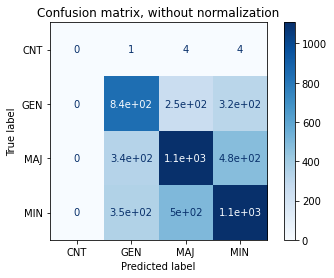

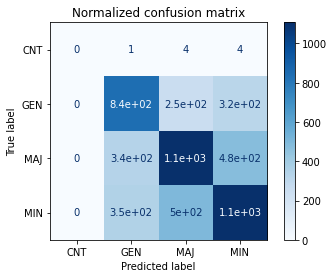

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_test.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

MULTINOMIAL

In [ ]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.61      0.57      0.59      1408
         MAJ       0.57      0.62      0.59      1919
         MIN       0.58      0.57      0.57      1958

    accuracy                           0.58      5294
   macro avg       0.44      0.44      0.44      5294
weighted avg       0.58      0.58      0.58      5294

Accuracy: 0.583679637325274


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


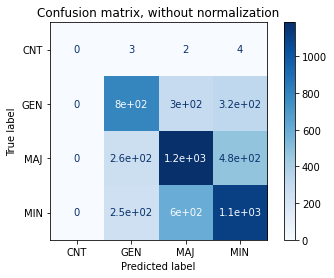

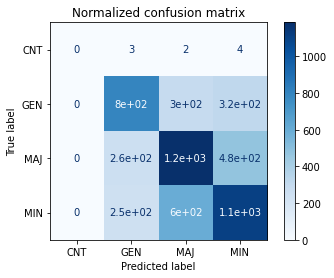

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       1.00      0.00      0.00         9
         GEN       0.61      0.50      0.55      1408
         MAJ       0.56      0.62      0.59      1919
         MIN       0.57      0.59      0.58      1958

    accuracy                           0.58      5294
   macro avg       0.69      0.43      0.43      5294
weighted avg       0.58      0.58      0.57      5294

Accuracy: 0.5761239138647526


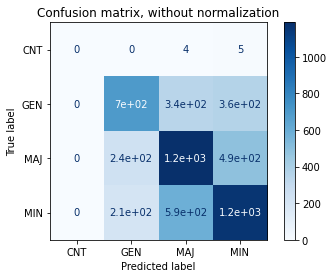

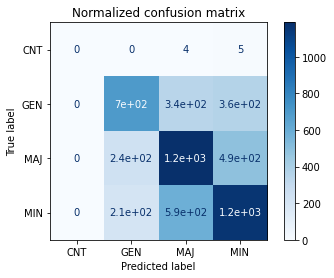

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       1.00      0.00      0.00         9
         GEN       0.59      0.59      0.59      1408
         MAJ       0.62      0.56      0.59      1919
         MIN       0.58      0.64      0.61      1958

    accuracy                           0.60      5294
   macro avg       0.70      0.45      0.45      5294
weighted avg       0.60      0.60      0.60      5294

Accuracy: 0.5974688326407254


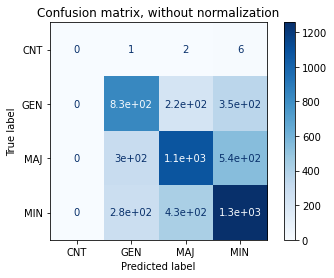

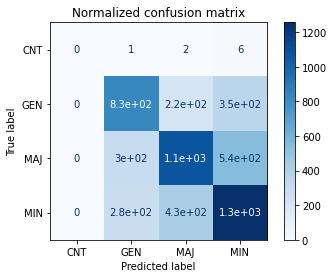

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SGD

In [ ]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


              precision    recall  f1-score   support

         CNT       1.00      0.00      0.00         9
         GEN       0.49      0.61      0.54      1408
         MAJ       0.67      0.36      0.47      1919
         MIN       0.53      0.68      0.59      1958

    accuracy                           0.54      5294
   macro avg       0.67      0.41      0.40      5294
weighted avg       0.57      0.54      0.53      5294

Accuracy: 0.5428787306384586


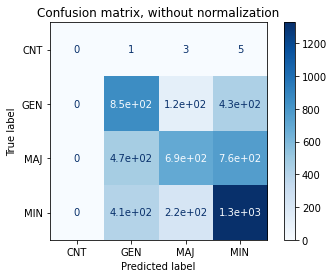

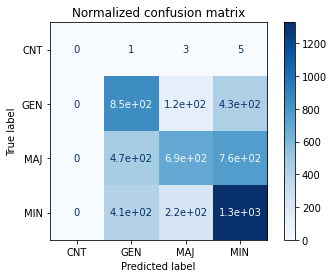

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.42      0.42      0.42      1408
         MAJ       0.49      0.50      0.49      1919
         MIN       0.48      0.47      0.48      1958

    accuracy                           0.47      5294
   macro avg       0.35      0.35      0.35      5294
weighted avg       0.47      0.47      0.47      5294

Accuracy: 0.46637703060068003


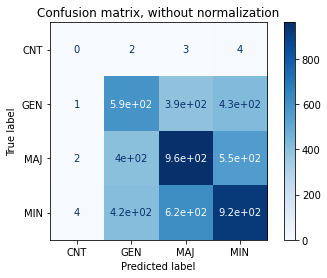

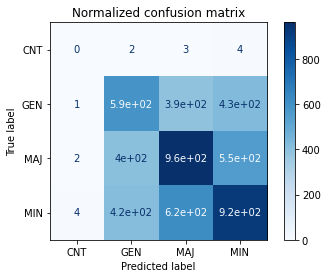

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()